In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model import preprocess_data

In [5]:
# Read and preprocess the dataset
raw_df = pd.read_csv('survey.csv')
df, y, label_encoders, scaler, le_target = preprocess_data(raw_df)
# For analysis, merge y back if needed:
df['treatment'] = y

In [6]:
# 1. Descriptive Statistics
print("\n=== Descriptive Statistics (Preprocessed Data) ===")
print("\nBasic Statistics:")
print(df.describe())

print("\nCategorical Variables Summary:")
print(df.describe(include=['object', 'int', 'float']))


=== Descriptive Statistics (Preprocessed Data) ===

Basic Statistics:
               Age       Gender      Country  self_employed  family_history  \
count  1266.000000  1266.000000  1266.000000    1266.000000     1266.000000   
mean      0.011150     0.834913     5.834123       0.122433        0.393365   
std       1.021722     0.413695     1.922031       0.327915        0.488690   
min      -1.971478     0.000000     0.000000       0.000000        0.000000   
25%      -0.728285     1.000000     5.000000       0.000000        0.000000   
50%      -0.175755     1.000000     7.000000       0.000000        0.000000   
75%       0.514908     1.000000     7.000000       0.000000        1.000000   
max       4.106355     2.000000     7.000000       1.000000        1.000000   

       work_interfere  no_employees  remote_work  tech_company     benefits  \
count     1266.000000   1266.000000  1266.000000   1266.000000  1266.000000   
mean         1.722749      2.725118     0.295419      0.834

In [7]:
# 2. Univariate Analysis
print("\n=== Univariate Analysis ===")


=== Univariate Analysis ===


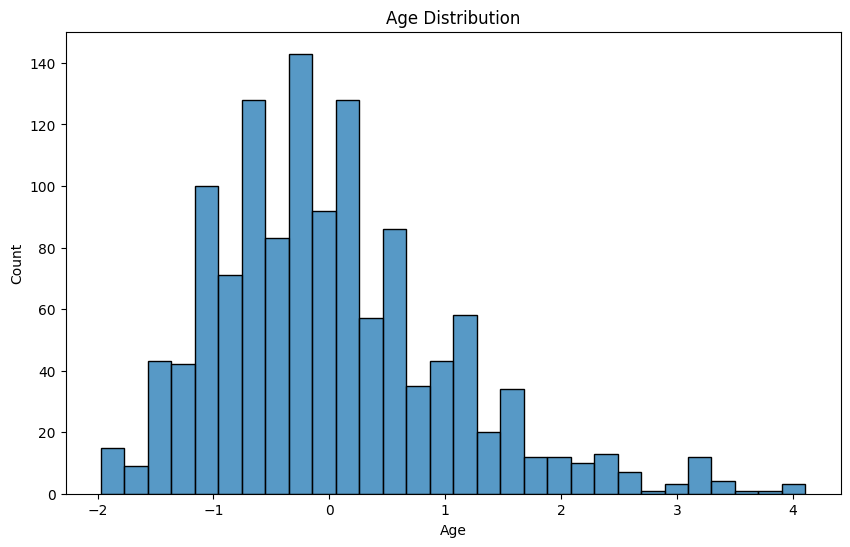

In [8]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')
plt.show()

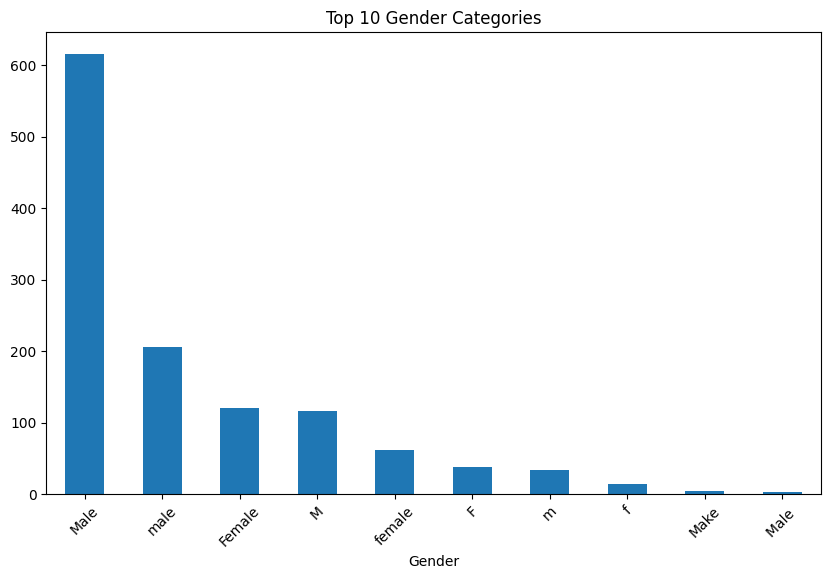

In [9]:
# Gender Distribution
df = pd.read_csv("survey.csv")
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Gender Categories')
plt.xticks(rotation=45)
plt.show()

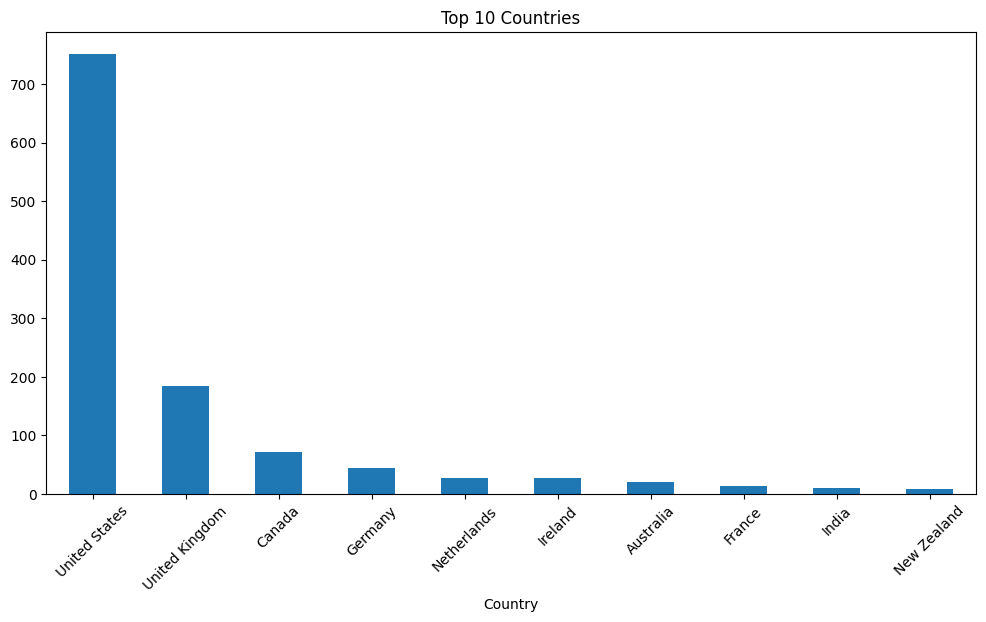

In [10]:
# Country Distribution
plt.figure(figsize=(12, 6))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

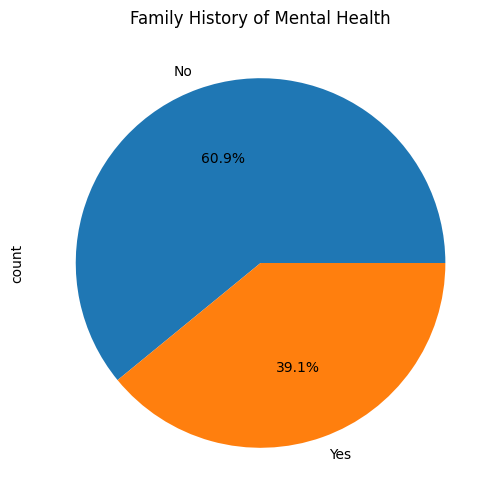

In [11]:
# Family History of Mental Health
plt.figure(figsize=(8, 6))
df['family_history'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Family History of Mental Health')
plt.show()

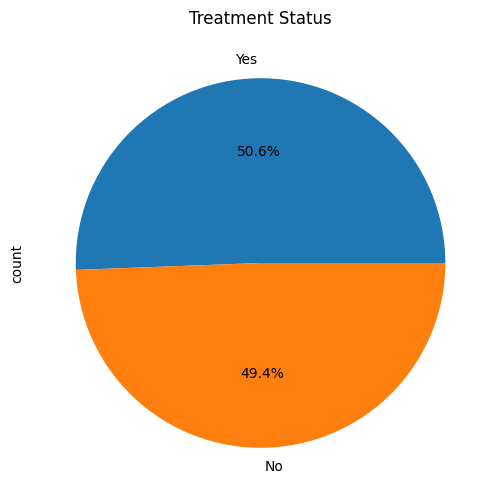

In [12]:
# Treatment Status
plt.figure(figsize=(8, 6))
df['treatment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Treatment Status')
plt.show()

In [13]:
# 3. Bivariate Analysis
print("\n=== Bivariate Analysis ===")


=== Bivariate Analysis ===


<Figure size 1000x600 with 0 Axes>

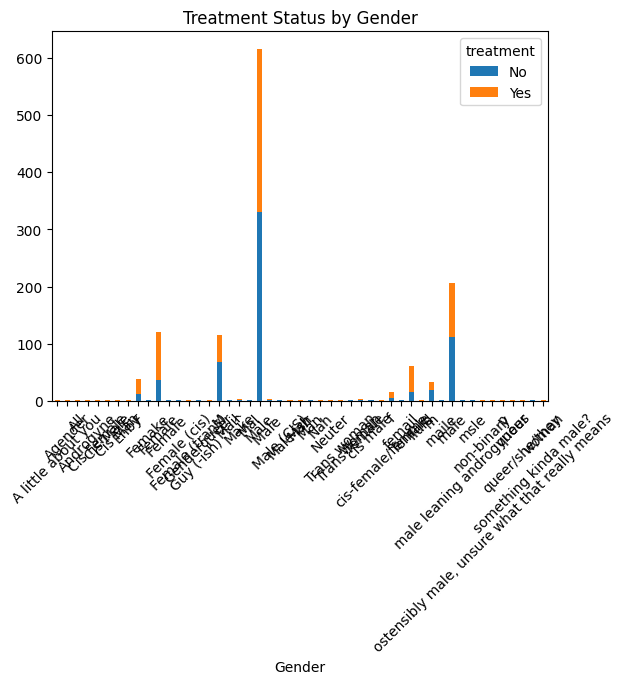

In [14]:
# Gender vs Treatment
plt.figure(figsize=(10, 6))
treatment_by_gender = pd.crosstab(df['Gender'], df['treatment'])
treatment_by_gender.plot(kind='bar', stacked=True)
plt.title('Treatment Status by Gender')
plt.xticks(rotation=45)
plt.show()

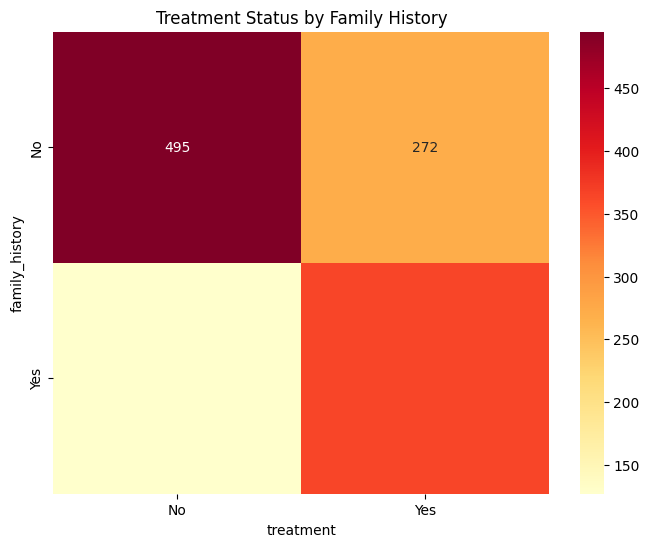

In [15]:
# Family History vs Treatment
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['family_history'], df['treatment']), annot=True, fmt='d', cmap='YlOrRd')
plt.title('Treatment Status by Family History')
plt.show()

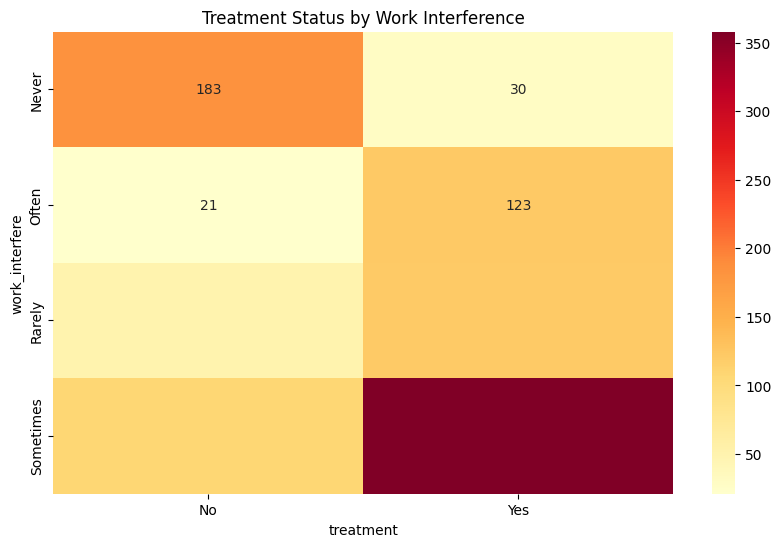

In [16]:
# Work Interference vs Treatment
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['work_interfere'], df['treatment']), annot=True, fmt='d', cmap='YlOrRd')
plt.title('Treatment Status by Work Interference')
plt.show()


=== Correlation Analysis ===


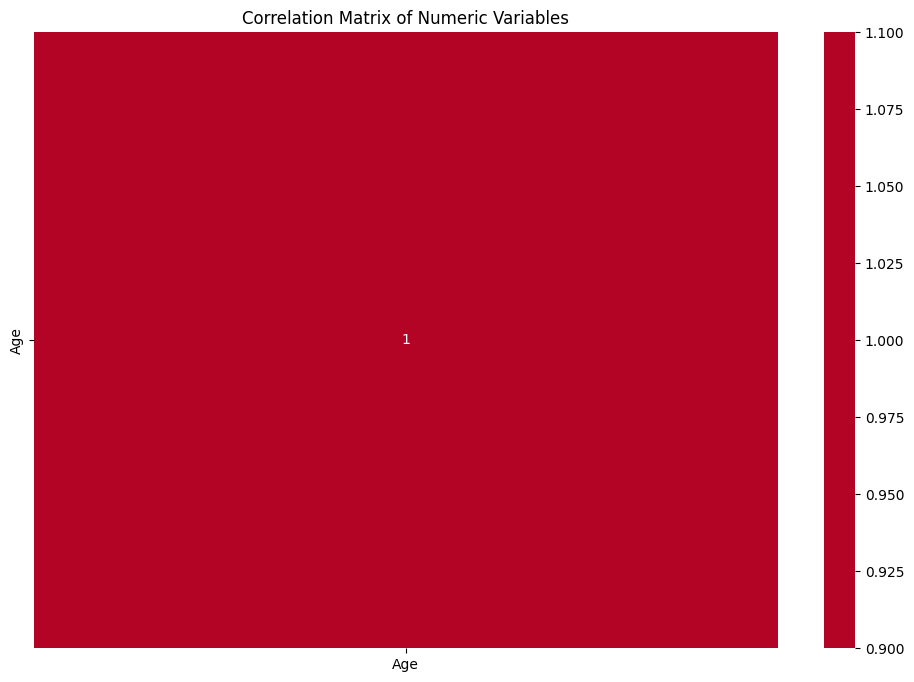

In [17]:
# 4. Correlation Analysis
print("\n=== Correlation Analysis ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [18]:
# 5. Additional Insights
print("\n=== Additional Insights ===")


=== Additional Insights ===


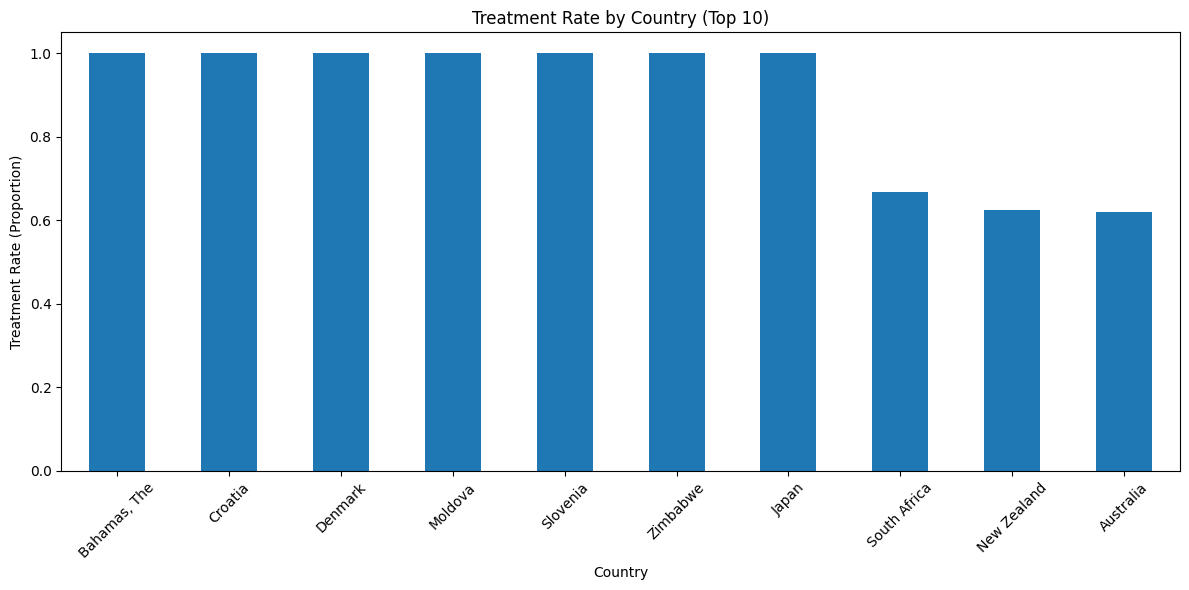

In [19]:
df = pd.read_csv("survey.csv")
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
treatment_rate = df.groupby('Country')['treatment'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
treatment_rate.head(10).plot(kind='bar')
plt.title('Treatment Rate by Country (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Treatment Rate (Proportion)')
plt.tight_layout()
plt.show()

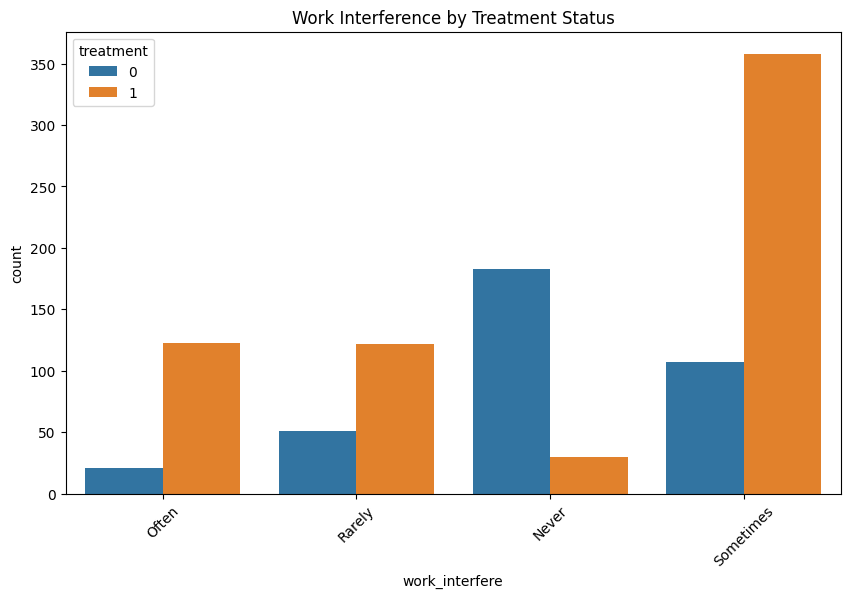

In [20]:
# Work Interference by Treatment Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title('Work Interference by Treatment Status')
plt.xticks(rotation=45)
plt.show()